In [4]:
import gym
import numpy as np

class InteractionAgentEnv(gym.Env):
    def __init__(self):
        super(InteractionAgentEnv, self).__init__()
        self.action_space = gym.spaces.Discrete(3)  # Three possible actions
        self.observation_space = gym.spaces.Box(low=0, high=10, shape=(1,), dtype=np.float32)
        self.state = None
        self.timestep = 0
        self.value_function = np.zeros(10)  # Value function for states 0 to 9
        self.learning_rate = 0.1  # Set a learning rate

        # Define rewards for specific states
        self.state_reward_map = {
            0: 5, 1: 3, 2: 1, 3: -1, 4: 0,
            5: 2, 6: 4, 7: 0, 8: 3, 9: 1,
        }

    def reset(self):
        self.state = np.random.uniform(low=0, high=10, size=(1,))
        self.timestep = 0
        return self.state

    def step(self, action):
        self.timestep += 1

        # Update state (simple random walk)
        self.state = np.random.uniform(low=0, high=10, size=(1,))
        discrete_state = int(np.clip(self.state[0], 0, 9))
        reward = self.state_reward_map.get(discrete_state, 0)

        # Incrementally update the value function using the formula
        self.value_function[discrete_state] += self.learning_rate * (reward - self.value_function[discrete_state])

        done = self.timestep >= 10  # End after 10 timesteps
        return self.state, reward, done, {}

    def render(self):
        current_reward = self.state_reward_map.get(int(np.clip(self.state[0], 0, 9)), 0)
        print(f"State: {self.state[0]:.2f}, Reward: {current_reward}, Timestep: {self.timestep}, Value: {self.value_function[int(np.clip(self.state[0], 0, 9))]:.2f}")

# Create environment
env = InteractionAgentEnv()

# Run the agent
total_rewards = []
reward_history = []

state = env.reset()
done = False

while not done:
    action = env.action_space.sample()  # Random action for illustration
    next_state, reward, done, info = env.step(action)

    total_rewards.append(reward)
    reward_history.append(reward)

    env.render()

# Print final value function
print("Final Value Function:", env.value_function)


State: 6.77, Reward: 4, Timestep: 1, Value: 0.40
State: 6.61, Reward: 4, Timestep: 2, Value: 0.76
State: 4.76, Reward: 0, Timestep: 3, Value: 0.00
State: 9.05, Reward: 1, Timestep: 4, Value: 0.10
State: 6.84, Reward: 4, Timestep: 5, Value: 1.08
State: 9.24, Reward: 1, Timestep: 6, Value: 0.19
State: 5.75, Reward: 2, Timestep: 7, Value: 0.20
State: 3.03, Reward: -1, Timestep: 8, Value: -0.10
State: 7.96, Reward: 0, Timestep: 9, Value: 0.00
State: 7.87, Reward: 0, Timestep: 10, Value: 0.00
Final Value Function: [ 0.     0.     0.    -0.1    0.     0.2    1.084  0.     0.     0.19 ]


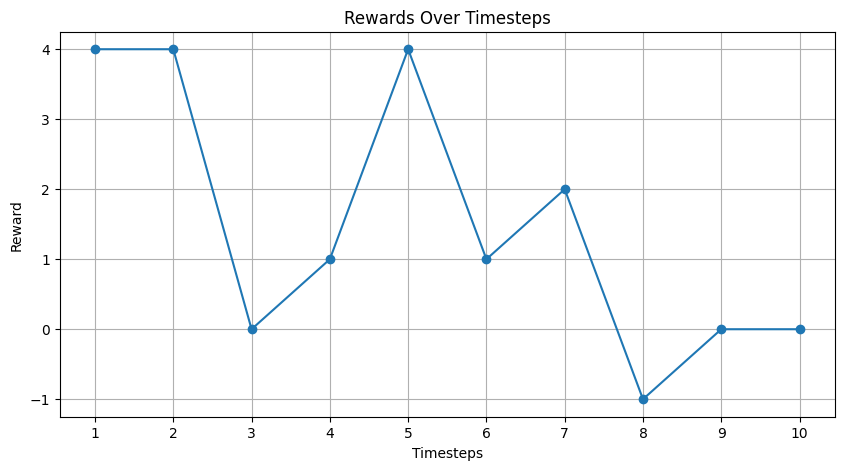

In [5]:
import matplotlib.pyplot as plt

# Plotting the rewards over time
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(reward_history) + 1), reward_history, marker='o')
plt.title('Rewards Over Timesteps')
plt.xlabel('Timesteps')
plt.ylabel('Reward')
plt.xticks(range(1, len(reward_history) + 1))
plt.grid()
plt.show()
